# In Class Exercise 7.3: Fun Survey (and More Basic Practice with Dataframes)

Getting started: 

* Results of the survey we asked the class to complete at the beginning of the semester are available here: https://docs.google.com/spreadsheets/d/1ip_dVSgO2JtStc5z8AojBUxHLpi17dtPNygNPaLgY58/edit?usp=sharing.
* Open that file in google forms. Go to File--> Download as--> download as CSV
* Take the downloaded file and upload it to the same folder as this notebook on JupyterLab.
***
## Step 1:
* Import pandas as pd. 
* Import matplotlib.pyplot as plt
* Use code to make your graphs look nice.
* Read the csv file and assign the result to `df`.

In [ ]:
# write and test your code here

## Step 2:
* Check your dataframe.
* Check the datatypes for each columns. Think about the types of questions you could answer with this data. Think about how the data might need to be cleaned to answer those questions. 
* Use code to print the total number of student responses contained in the dataframe. 

In [ ]:
# write and test your code here

## Step 3:
* Rename your columns using `renamelist` below to make your columns easier to work with 
* Check your dataframe to confirm this has worked. 

In [ ]:
renamelist = ['Timestamp', 'musicartist', 'height', 'city', '30min', 'travel', 'likepizza', 'deepdish', 'sport', 'spell', 'hangout', 'talk', 'year', 'quote']
# write and test your code here

## Step 4:
* The survey asked 'Do you think you talk more or less than the average person?', 'Is Chicago-style deep dish actually pizza or is it really casserole?', 'Which is the most difficult to spell? '. Create descriptive statistics and vizualizations that desribe students responses to each of these three questions seperately. 
* Use cross-tabs to examine whether there is any relation between how a student answered these questions. For example, do students who think deep dish is a casserole also say they talk more than the average person? 


In [ ]:
# write and test your code here

## Step 5a:
* We want to calculate the mean value for the optimal number of people to hangout with. However, some students responded with a range (for example 6-7) rather than an integer so this column is currently being treated as a string.  
* Run the cell below then check your dataframe and see if you can figure out what the code did. Hint: NaN means "Not a Number".  

In [ ]:
df["hangout_numeric"] = pd.to_numeric(df["hangout"], errors='coerce') # what does this code do?
df[['hangout', 'hangoutnum']] # what does this code do?

## Step 5b:
* Calculate the mean value of 'hangout_numeric'.
* We essentially threw out data in the previous step by removing the answers that contained a range. What effect might this have on your mean value?
* Create a vizualization to examine the question: Do people who say they talk more or less differ in how many people they think is the optimal number to hangout with?

In [ ]:
# write and test your code here

## Step 6:
* Write code to find the top three cities students want to live in and the top three locations students want to travel to.


In [ ]:
# write and test your code here

***
## Step 7a:
* The time machine question also contains a mix of numbers and letters that needs to be cleaned before we can do much with it.  
* Run this to get a 'year_clean' column. Don't worry about how this code works. 

In [ ]:
# you won't need to know this for the test
df['year_clean'] = df['year'].str.extract(r'(\d\d\d\d)')
df['year_num'] = pd.to_numeric(df["year_clean"], errors='coerce')
df['decade'] = df['year_num'] // 10 * 10

## Step 7b:
* It is highly likely that there are multiple outliers in our decade data. Either students who want to go back to prehistory or students who want to do deep into the future. Use query to create a data set that only contains rows with values between the years of 1900 and 2000. Call the new dataset 'dfrecent'.


In [ ]:
# write and test your code here

## Step 7c:
* Plot a histogram of 'decade' using dfrecent. What's the least popular decade to visit? 

In [ ]:
# write and test your code here

***
## Step 8a:
* Let's pull some data out of the dataframe so you can work on the data using tools you are familiar with. This code block takes a series from the dataframe and places each seperate value in the series in a list.

In [75]:
# don't worry about how this code works. It won't be on the test.
quotelist = df['quote'].loc[df['quote'].notnull()].tolist()

## Step 8b:
* Use a for loop using `quotelist` to calculate the average length of quotes submitted by students

In [ ]:
# write and test your code here

## Step 8c:
* We can do the same thing in pandas by telling the dataframe to store the length of each value in a new column and then getting the mean of that column.
* This should return the same answer as your for loop

In [ ]:
df['quotelength'] = df['quote'].str.len() # in pandas the length of s string can be calculated by calling the str.len() method
# write code here to get the mean of 'quotelength'

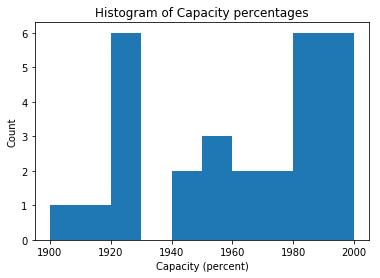

81.22916666666667


81.22916666666667

In [77]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('CD125-02-Survey-Fun (Responses) - Form Responses 1.csv')

renamelist= ['Timestamp', 'musicartist', 'height', 'city', '30min', 'travel', 'likepizza', 'deepdish', 'sport', 'spell', 'hangout', 'talk', 'year', 'quote']

df.columns = renamelist

# targetlist = ['talk', 'deepdish', 'spell']
# for t in targetlist:
#     print(df[t].value_counts())
#     print()
    
pd.crosstab([df['talk'], df['deepdish']], df['spell'], margins=True)


df["hangout_numeric"] = pd.to_numeric(df["hangout"], errors='coerce')

df['year_clean'] = df['year'].str.extract(r'(\d\d\d\d)')
df['year_num'] = pd.to_numeric(df["year_clean"], errors='coerce')
df['decade'] = df['year_num'] // 10 * 10

dfdecade = df.query("decade > 1899 and decade < 2001")

dfdecade

plt.hist(x="decade", data=dfdecade)
plt.xlabel("Capacity (percent)")
plt.ylabel("Count")
plt.title("Histogram of Capacity percentages")
plt.show()

quotelist = df['quote'].loc[df['quote'].notnull()].tolist()


qlen = 0 
for quote in quotelist:
    #print(type(quote))
    #print(quote)
    qlen = qlen + len(quote)
    
qavg = qlen/len(quotelist)

print(qavg)

df['quotelength'] = df.quote.str.len()
df.quotelength.mean()